Load the `ISLR2` and `tidyverse` packages.

In [1]:


library(tidyverse)
library(ISLR2)

Warning message:
“Your system is mis-configured: ‘/var/db/timezone/localtime’ is not a symlink”
Warning message:
“‘/var/db/timezone/localtime’ is not identical to any known timezone file”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


`glimpse` the `Auto` dataset (this comes from the `ISLR2` package).

In [2]:

glimpse(Auto)


Rows: 392
Columns: 9
$ mpg          <dbl> 18, 15, 18, 16, 17, 15, 14, 14, 14, 15, 15, 14, 15, 14, 2…
$ cylinders    <int> 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 4, 6, 6, 6, 4, …
$ displacement <dbl> 307, 350, 318, 304, 302, 429, 454, 440, 455, 390, 383, 34…
$ horsepower   <int> 130, 165, 150, 150, 140, 198, 220, 215, 225, 190, 170, 16…
$ weight       <int> 3504, 3693, 3436, 3433, 3449, 4341, 4354, 4312, 4425, 385…
$ acceleration <dbl> 12.0, 11.5, 11.0, 12.0, 10.5, 10.0, 9.0, 8.5, 10.0, 8.5, …
$ year         <int> 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 7…
$ origin       <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, …
$ name         <fct> chevrolet chevelle malibu, buick skylark 320, plymouth sa…


Plot `mpg`  as a function of `displacement`.

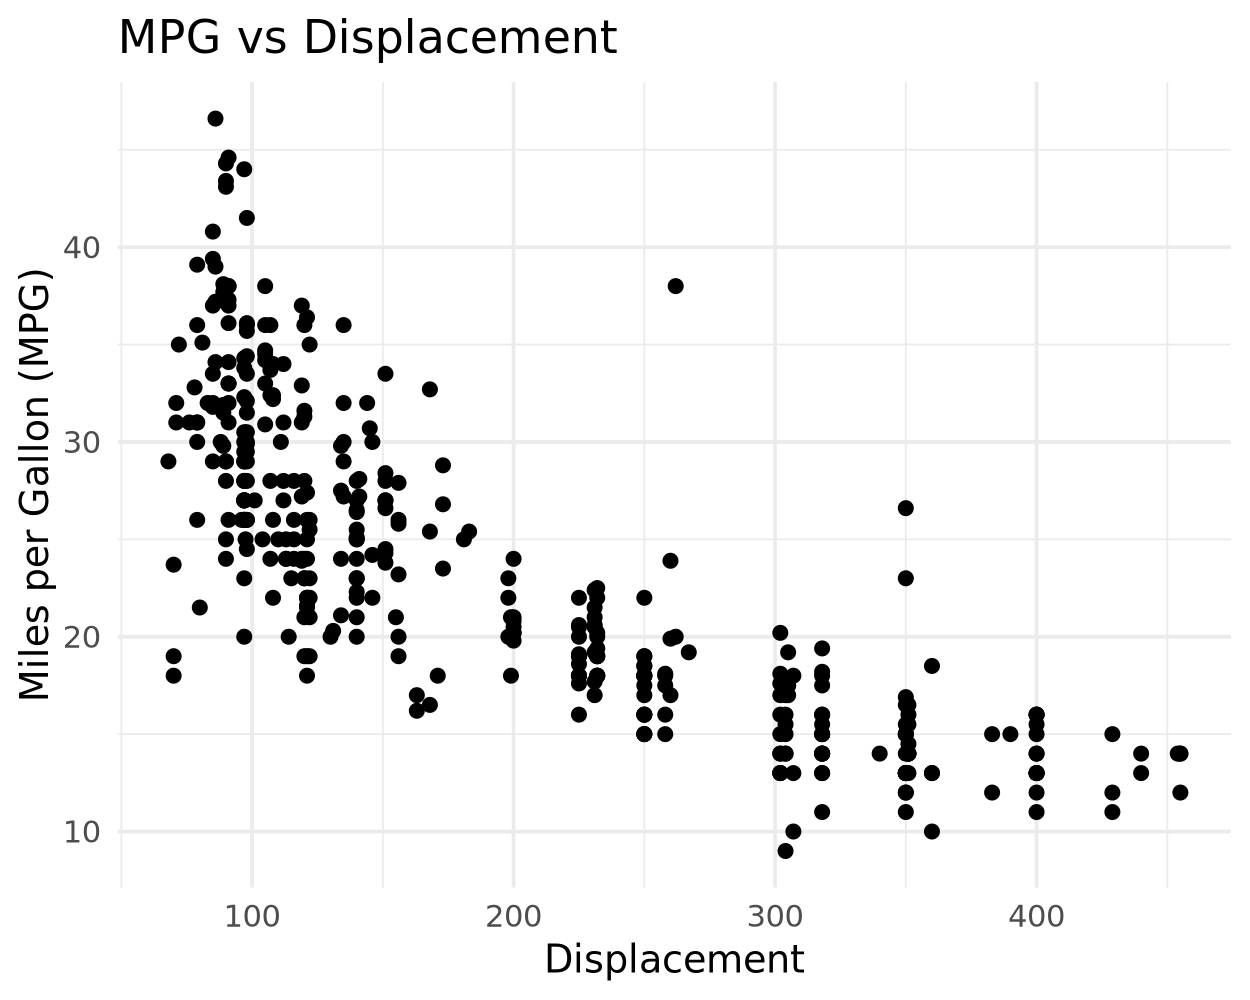

In [3]:
ggplot(Auto, aes(x = displacement, y = mpg)) +
  geom_point() +
  labs(
    title = "MPG vs Displacement",
    x = "Displacement",
    y = "Miles per Gallon (MPG)"
  ) +
  theme_minimal()



❓Does the relationship of `mpg` to `displacement` look linear?

In [4]:
no this is not linear, the rate at which mpg and displacement change is not
constant, the farther the displacement the lower the mpg



ERROR: Error in parse(text = input): <text>:1:4: unexpected symbol
1: no this
       ^


Model `mpg` as a function of `displacement` and `cylinders`. 

- Transform the `displacement` variable using a `spline` or `polynomial` transform. (Hint: use `step_ns` or `step_poly`).
- Combine `step_mutate(cyl_cat = factor(cylinders))` followed by `step_dummy(cyl_cat)` and `step_rm(cylinders)` to convert `cylinders` to categorical data for the model.

Assuming you name your fitted model `mod_fit` the code below can be used to visualize your model:

```r
predict(mod_fit, rec |> juice()) |>
    bind_cols(Auto) |>
ggplot(aes(x = displacement, y = mpg)) +
    geom_point(size = 1, alpha = 0.35) +
    geom_line(aes(y = .pred, color = factor(cylinders)), linewidth = 1)
```

**Create and visualize your model below...**

In [5]:
library(recipes)
library(parsnip)
library(tidymodels)


Attaching package: ‘recipes’


The following object is masked from ‘package:stringr’:

    fixed


The following object is masked from ‘package:stats’:

    step


── Attaching packages ────────────────────────────────────── tidymodels 1.3.0 ──

✔ broom        1.0.8     ✔ tune         1.3.0
✔ dials        1.4.0     ✔ workflows    1.2.0
✔ infer        1.0.8     ✔ workflowsets 1.1.0
✔ modeldata    1.4.0     ✔ yardstick    1.3.2
✔ rsample      1.3.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::step()



In [9]:
rec <- recipe(mpg ~ displacement + cylinders, data = Auto) |>
  step_ns(displacement, deg_free = 4) |>
  step_mutate(cyl_cat = factor(cylinders)) |>
  step_dummy(cyl_cat) |>
  step_rm(cylinders)

mod_spec <- linear_reg() |>
  set_engine("lm")

wf <- workflow() |>
  add_model(mod_spec) |>
  add_recipe(rec)

mod_fit <- fit(wf, data = Auto)


In [12]:
rec_prep <- prep(rec)

pred_df <- predict(mod_fit, new_data = Auto) |> bind_cols(Auto)



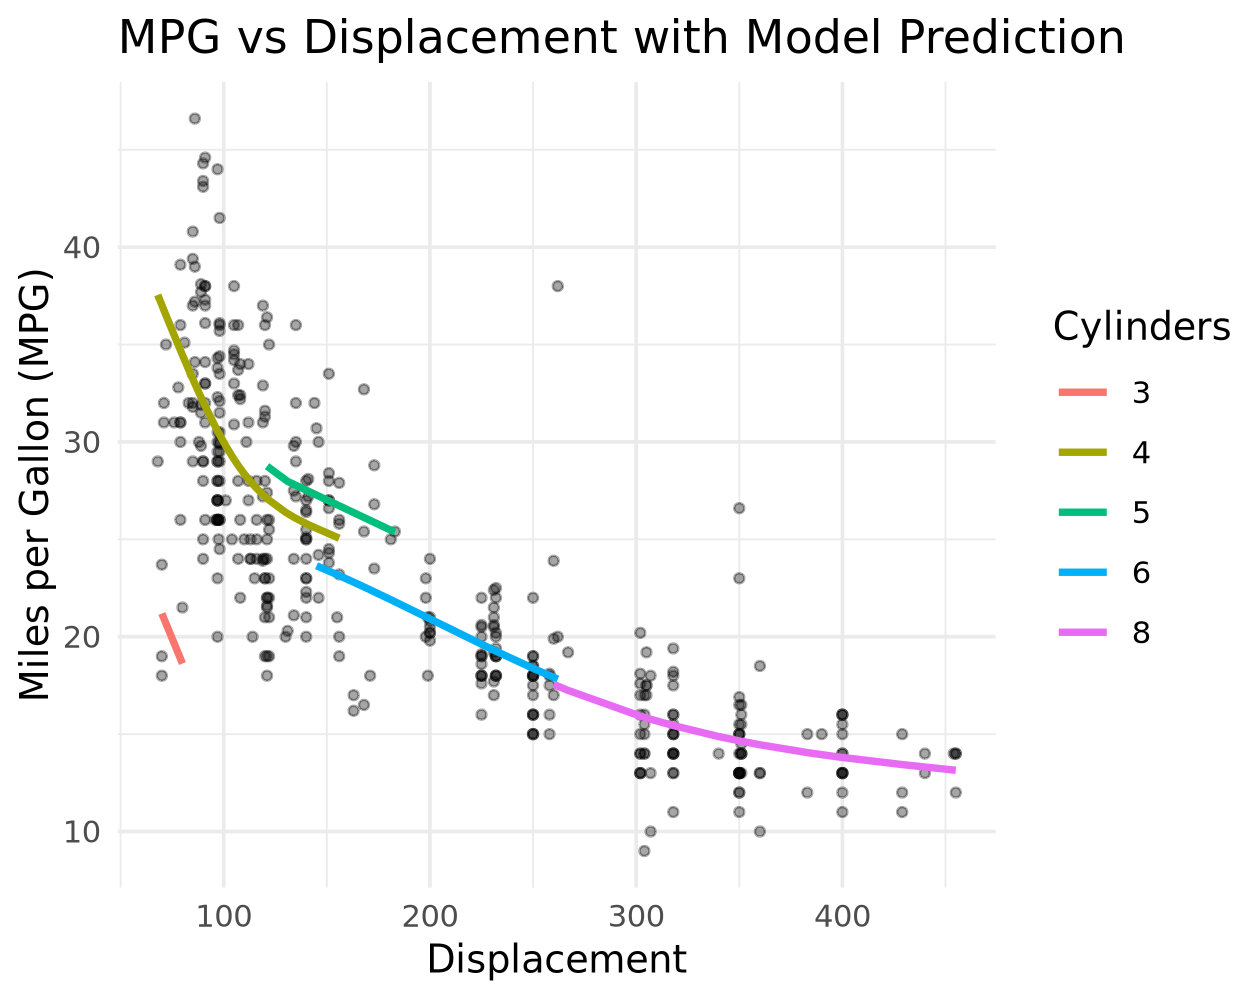

In [13]:
ggplot(pred_df, aes(x = displacement, y = mpg)) +
  geom_point(size = 1, alpha = 0.35) +
  geom_line(aes(y = .pred, color = factor(cylinders)), linewidth = 1) +
  labs(
    title = "MPG vs Displacement with Model Prediction",
    x = "Displacement",
    y = "Miles per Gallon (MPG)",
    color = "Cylinders"
  ) +
  theme_minimal()